<a href="https://colab.research.google.com/github/DemirHasicic/AIPortfolio/blob/main/Mentaldisorderclass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
from google.colab import drive
import pandas as pd

# Mount Google Drive
drive.mount('/content/drive')

# Define the file path to the dataset within Google Drive
google_drive_path = '/content/drive/My Drive/Colab Notebooks/Dataset-Mental-Disorders.csv'

# Load the dataset using pandas
df = pd.read_csv(google_drive_path)

# Display the first few rows of the dataset
print(df.head())


Mounted at /content/drive
  Patient Number    Sadness    Euphoric  Exhausted Sleep dissorder Mood Swing  \
0     Patiant-01    Usually      Seldom  Sometimes       Sometimes        YES   
1     Patiant-02    Usually      Seldom    Usually       Sometimes         NO   
2     Patiant-03  Sometimes  Most-Often  Sometimes       Sometimes        YES   
3     Patiant-04    Usually      Seldom    Usually      Most-Often        YES   
4     Patiant-05    Usually     Usually  Sometimes       Sometimes         NO   

  Suicidal thoughts Anorxia Authority Respect Try-Explanation  \
0              YES       NO                NO             YES   
1               YES      NO                NO              NO   
2                NO      NO                NO             YES   
3               YES     YES                NO             YES   
4                NO      NO                NO              NO   

  Aggressive Response Ignore & Move-On Nervous Break-down Admit Mistakes  \
0                  N

In [9]:
!pip install catboost
!pip install pingouin

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.9/198.9 kB 4.3 MB/s eta 0:00:00


In [10]:
# Data manipulation
#============================================
import pandas as pd
import numpy as np
pd.set_option("display.max_columns", None)

# Data visualization
#=================================================
import matplotlib.pyplot as plt
import seaborn as sns

# Stats
#=====================================================
import pingouin as pg

# Data preprocessing
#========================================================
import re
from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Models
#===========================================================================
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# Metrics
#==========================================================================
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

# tqdm
#==========================
from tqdm.auto import tqdm

# warnings
#==================================
import warnings
warnings.filterwarnings('ignore')

## Exploring data

In [11]:
data = pd.read_csv(google_drive_path)
data.head()


,Patient Number,Sadness,Euphoric,Exhausted,Sleep dissorder,Mood Swing,Suicidal thoughts,Anorxia,Authority Respect,Try-Explanation,Aggressive Response,Ignore & Move-On,Nervous Break-down,Admit Mistakes,Overthinking,Sexual Activity,Concentration,Optimisim,Expert Diagnose
0,Patiant-01,Usually,Seldom,Sometimes,Sometimes,YES,YES,NO,NO,YES,NO,NO,YES,YES,YES,3 From 10,3 From 10,4 From 10,Bipolar Type-2
1,Patiant-02,Usually,Seldom,Usually,Sometimes,NO,YES,NO,NO,NO,NO,NO,NO,NO,NO,4 From 10,2 From 10,5 From 10,Depression
2,Patiant-03,Sometimes,Most-Often,Sometimes,Sometimes,YES,NO,NO,NO,YES,YES,NO,YES,YES,NO,6 From 10,5 From 10,7 From 10,Bipolar Type-1
3,Patiant-04,Usually,Seldom,Usually,Most-Often,YES,YES,YES,NO,YES,NO,NO,NO,NO,NO,3 From 10,2 From 10,2 From 10,Bipolar Type-2
4,Patiant-05,Usually,Usually,Sometimes,Sometimes,NO,NO,NO,NO,NO,NO,NO,YES,YES,YES,5 From 10,5 From 10,6 From 10,Normal


In [12]:
#Dataset size
rows, columns = data.shape[0], data.shape[1]

print(f'Rowss: {rows}')
print(f'Columns: {columns}')

Rowss: 120
Columns: 19


In [13]:
#Dataset info
print("#" * 50)
print(" " * 14, "Data set Information")
print("#" * 50)
print(data.info())

##################################################
               Data set Information
##################################################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Patient Number       120 non-null    object
 1   Sadness              120 non-null    object
 2   Euphoric             120 non-null    object
 3   Exhausted            120 non-null    object
 4   Sleep dissorder      120 non-null    object
 5   Mood Swing           120 non-null    object
 6   Suicidal thoughts    120 non-null    object
 7   Anorxia              120 non-null    object
 8   Authority Respect    120 non-null    object
 9   Try-Explanation      120 non-null    object
 10  Aggressive Response  120 non-null    object
 11  Ignore & Move-On     120 non-null    object
 12  Nervous Break-down   120 non-null    object
 13  Admit Mistakes   

## EDA

In [14]:
#Configure the name of each feature
data.columns = data.columns.str.replace(" ", "_")
data.columns

Index(['Patient_Number', 'Sadness', 'Euphoric', 'Exhausted', 'Sleep_dissorder',
       'Mood_Swing', 'Suicidal_thoughts', 'Anorxia', 'Authority_Respect',
       'Try-Explanation', 'Aggressive_Response', 'Ignore_&_Move-On',
       'Nervous_Break-down', 'Admit_Mistakes', 'Overthinking',
       'Sexual_Activity', 'Concentration', 'Optimisim', 'Expert_Diagnose'],
      dtype='object')

In [15]:
#Duplicate the data
print(data.duplicated().sum())

0


In [16]:
#Missing values
df_null_values = data.isnull().sum().to_frame().rename(columns = {0:'count'})
df_null_values['%'] = (df_null_values['count'] / len(data)) * 100.
df_null_values = df_null_values.sort_values(by = '%', ascending = False)
df_null_values.style.background_gradient(cmap = 'coolwarm')

,count,%
Patient_Number,0,0.000000
Aggressive_Response,0,0.000000
Optimisim,0,0.000000
Concentration,0,0.000000
Sexual_Activity,0,0.000000
Overthinking,0,0.000000
Admit_Mistakes,0,0.000000
Nervous_Break-down,0,0.000000
Ignore_&_Move-On,0,0.000000
Try-Explanation,0,0.000000


In [17]:
#We remove the column `Patient_Number` because it does not add value to our analysis.
data = data.drop("Patient_Number", axis = 1)
data.head()

,Sadness,Euphoric,Exhausted,Sleep_dissorder,Mood_Swing,Suicidal_thoughts,Anorxia,Authority_Respect,Try-Explanation,Aggressive_Response,Ignore_&_Move-On,Nervous_Break-down,Admit_Mistakes,Overthinking,Sexual_Activity,Concentration,Optimisim,Expert_Diagnose
0,Usually,Seldom,Sometimes,Sometimes,YES,YES,NO,NO,YES,NO,NO,YES,YES,YES,3 From 10,3 From 10,4 From 10,Bipolar Type-2
1,Usually,Seldom,Usually,Sometimes,NO,YES,NO,NO,NO,NO,NO,NO,NO,NO,4 From 10,2 From 10,5 From 10,Depression
2,Sometimes,Most-Often,Sometimes,Sometimes,YES,NO,NO,NO,YES,YES,NO,YES,YES,NO,6 From 10,5 From 10,7 From 10,Bipolar Type-1
3,Usually,Seldom,Usually,Most-Often,YES,YES,YES,NO,YES,NO,NO,NO,NO,NO,3 From 10,2 From 10,2 From 10,Bipolar Type-2
4,Usually,Usually,Sometimes,Sometimes,NO,NO,NO,NO,NO,NO,NO,YES,YES,YES,5 From 10,5 From 10,6 From 10,Normal


In [18]:
  #We select the categorical features to display the unique values and to ensure that there are no coding errors.
  categorical_features = data.select_dtypes(include = ['object', 'category']).columns.to_list()

  print(f'Total categorical features = {len(categorical_features)}')

Total categorical features = 18


In [19]:
for cat_feat in categorical_features:
    print(f'* {cat_feat}: {data[cat_feat].unique()}\n')

* Sadness: ['Usually' 'Sometimes' 'Seldom' 'Most-Often']

* Euphoric: ['Seldom' 'Most-Often' 'Usually' 'Sometimes']

* Exhausted: ['Sometimes' 'Usually' 'Seldom' 'Most-Often']

* Sleep_dissorder: ['Sometimes' 'Most-Often' 'Usually' 'Seldom']

* Mood_Swing: ['YES' 'NO']

* Suicidal_thoughts: ['YES ' 'YES' 'NO']

* Anorxia: ['NO' 'YES']

* Authority_Respect: ['NO' 'YES']

* Try-Explanation: ['YES' 'NO']

* Aggressive_Response: ['NO' 'YES']

* Ignore_&_Move-On: ['NO' 'YES']

* Nervous_Break-down: ['YES' 'NO']

* Admit_Mistakes: ['YES' 'NO']

* Overthinking: ['YES' 'NO']

* Sexual_Activity: ['3 From 10' '4 From 10' '6 From 10' '5 From 10' '7 From 10' '8 From 10'
 '9 From 10' '2 From 10' '1 From 10']

* Concentration: ['3 From 10' '2 From 10' '5 From 10' '4 From 10' '7 From 10' '6 From 10'
 '1 From 10' '8 From 10']

* Optimisim: ['4 From 10' '5 From 10' '7 From 10' '2 From 10' '6 From 10' '9 From 10'
 '3 From 10' '8 From 10' '1 From 10']

* Expert_Diagnose: ['Bipolar Type-2' 'Depression' 'B

In [20]:
#We see that the column suicidal thoughts has mistakes so we replace the blank space
data['Suicidal_thoughts'] = data['Suicidal_thoughts'].str.replace(" ", "")

:Now we visualize the distribution of each class in each of the variables.

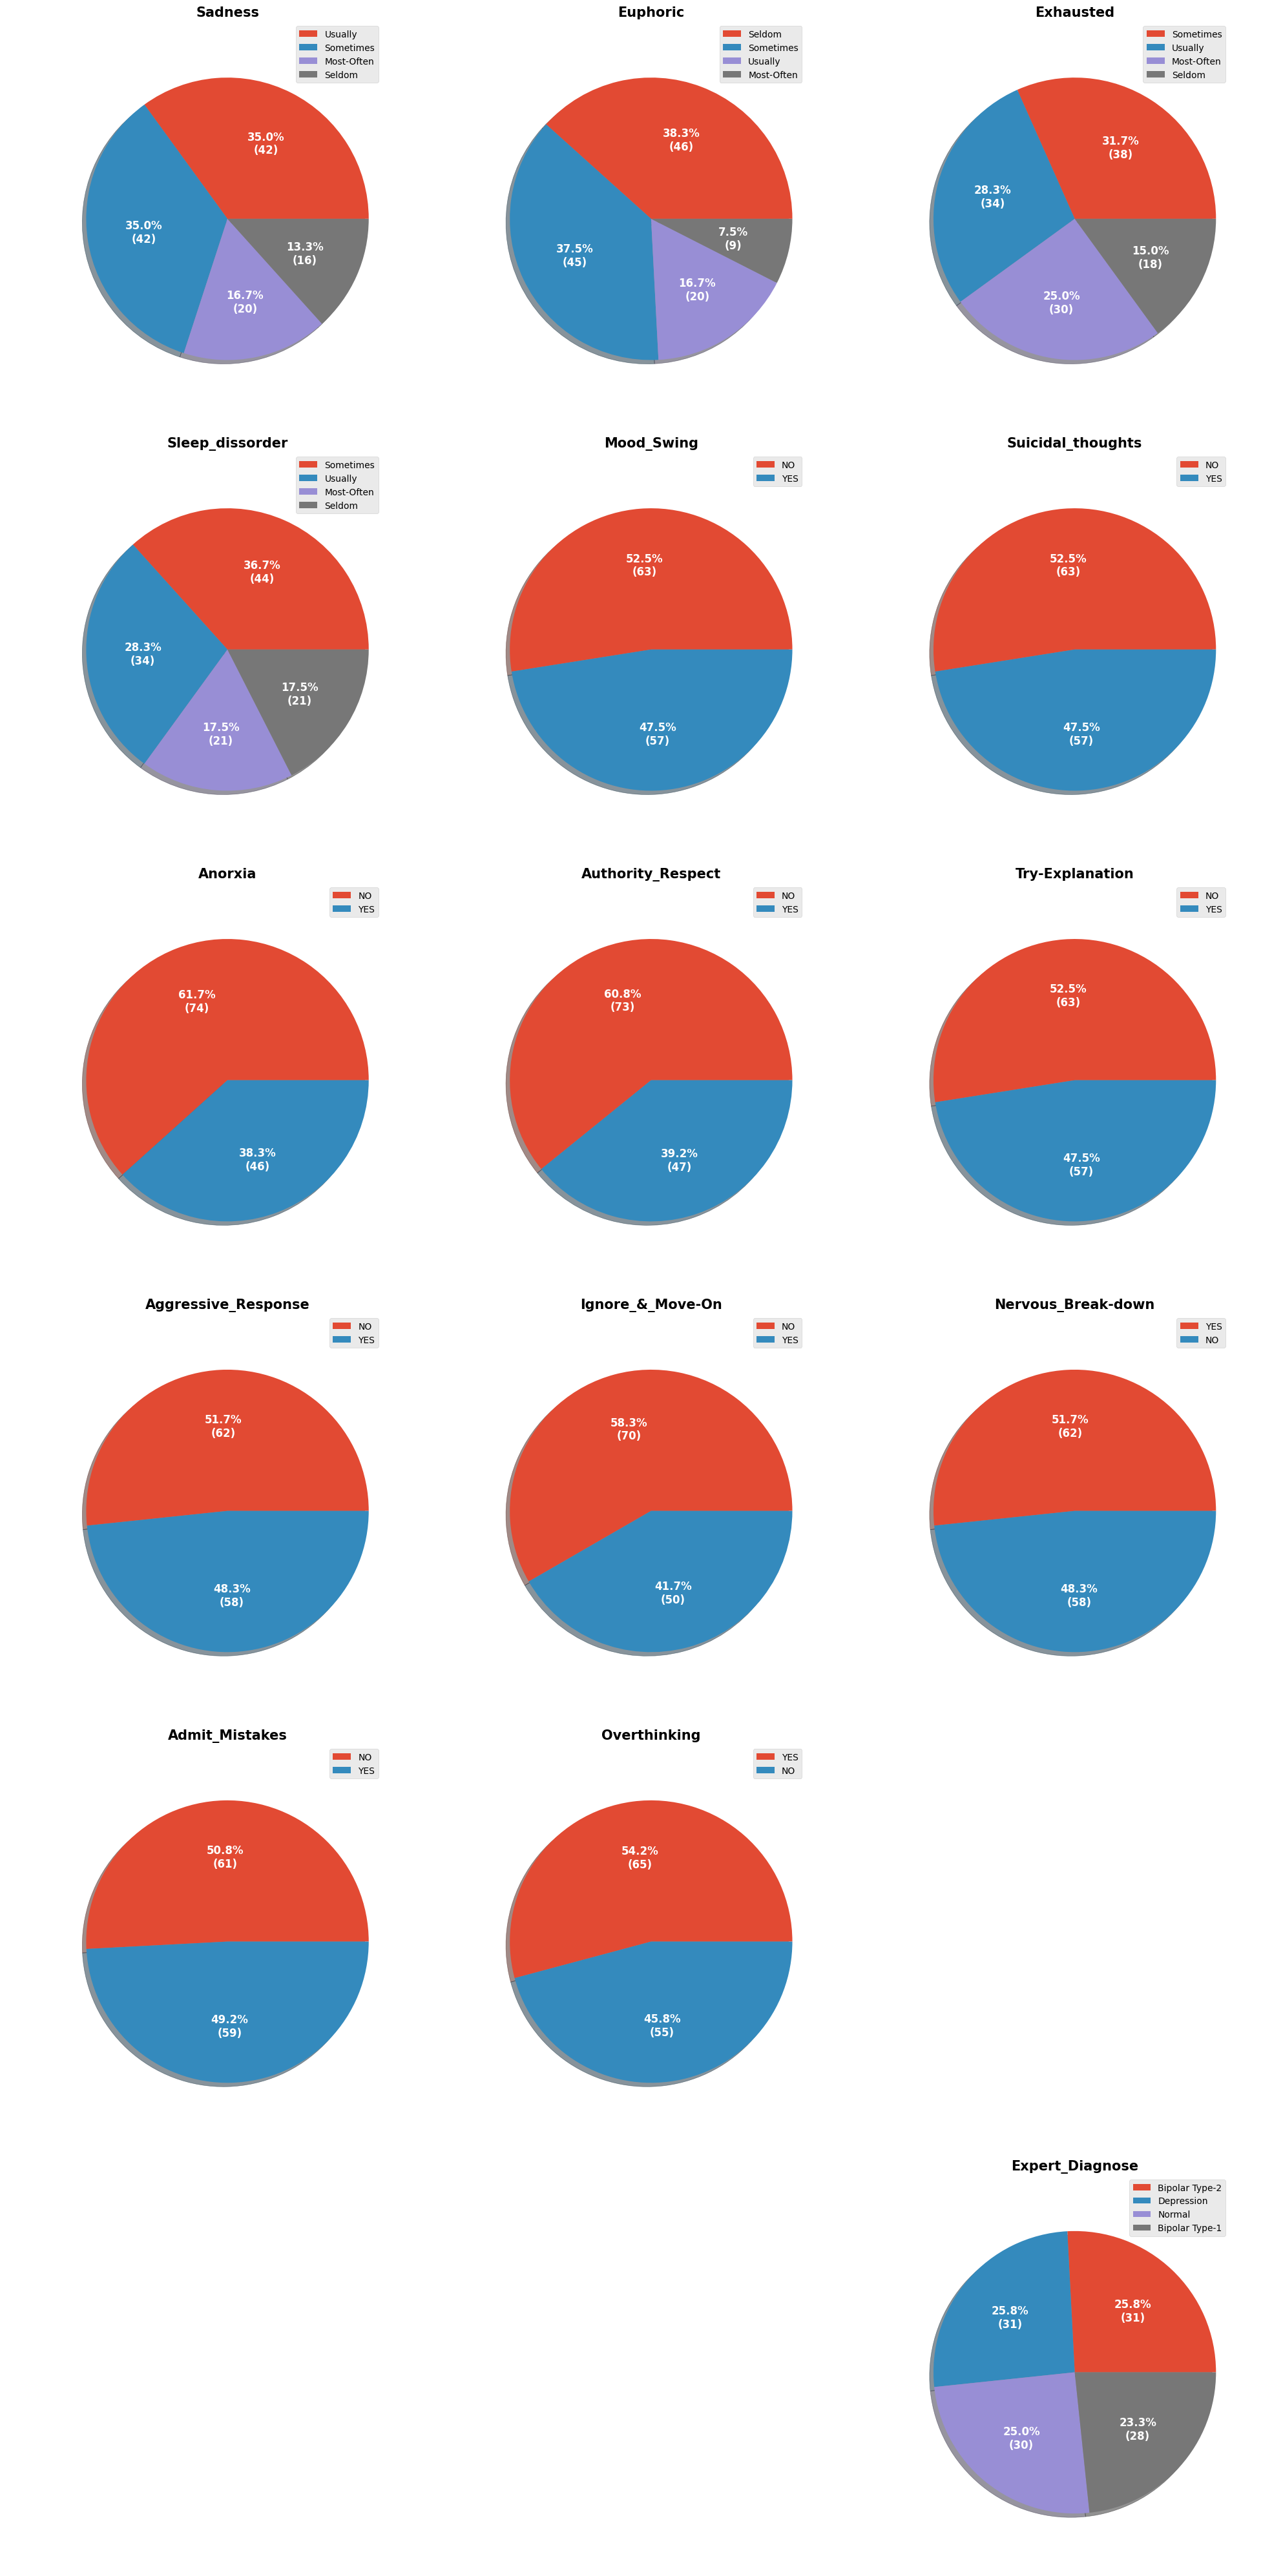

In [26]:
plt.style.use('ggplot')

#function for formating percentage labels for pie charts
def autopct_fun(abs_values):
    gen = iter(abs_values)
    return lambda pct: f"{pct:.1f}%\n({next(gen)})"

fig,ax = plt.subplots(nrows = 6, ncols = 3, figsize = (20,40))
ax = ax.flat

for i,cat_feat in enumerate(categorical_features):

    if cat_feat == 'Sexual_Activity' or cat_feat == 'Concentration' or cat_feat == 'Optimisim':
        continue

    #value count for each category (value.counts() counts unique values within the column)
    df_class = data[cat_feat].value_counts().to_frame()
    labels = df_class.index
    values = df_class.iloc[:,0].to_list()

    ax[i].pie(x = values, labels = labels, autopct=autopct_fun(values), shadow = True, textprops = {'color':'white', 'fontsize':12, 'fontweight':'bold'})
    ax[i].legend(labels, loc = 'best')
    ax[i].set_title(cat_feat, fontsize = 15, fontweight = "bold", color = "black")
    ax[i].axis('equal')

for j in [14,15,16]:
    fig.delaxes(ax = ax[j])

fig.tight_layout()
fig.show()


In [24]:
df_class

,Expert_Diagnose
Bipolar Type-2,31
Depression,31
Normal,30
Bipolar Type-1,28


In [25]:
labels

Index(['Bipolar Type-2', 'Depression', 'Normal', 'Bipolar Type-1'], dtype='object')

## Symptoms count for each diagnosis

In [28]:
def bar_plot(name:str):
    df_class = data[name].value_counts().to_frame().sort_index()
    df_class
    labels = df_class.index.to_list()
    values = df_class.iloc[:,0]

    fig,ax = plt.subplots(figsize = (11,4))
    rects = ax.bar(x = labels, height = values, color = 'blue', edgecolor = 'black', linewidth = 2.1)

    def autolabel(rects):
        for rect in rects:
            height = rect.get_height()
            ax.annotate(text = height,
                        xy = (rect.get_x() + rect.get_width()/2, height),
                        xytext = (0,3),
                        textcoords = 'offset points',
                        ha = 'center',
                        va = 'bottom')

    autolabel(rects)
    ax.set_title(name, fontsize = 12, fontweight = 'bold', color = 'black')
    ax.set_ylabel('count', fontsize = 10, fontweight = 'bold', color = 'black')
    fig.show()

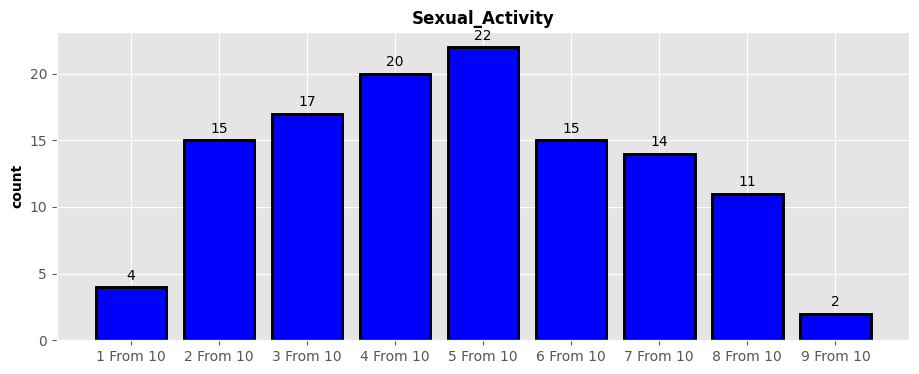

In [29]:
bar_plot('Sexual_Activity')

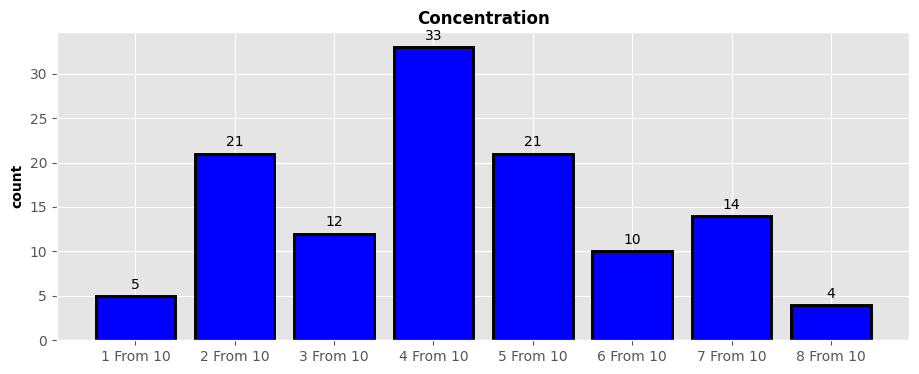

In [30]:
bar_plot('Concentration')

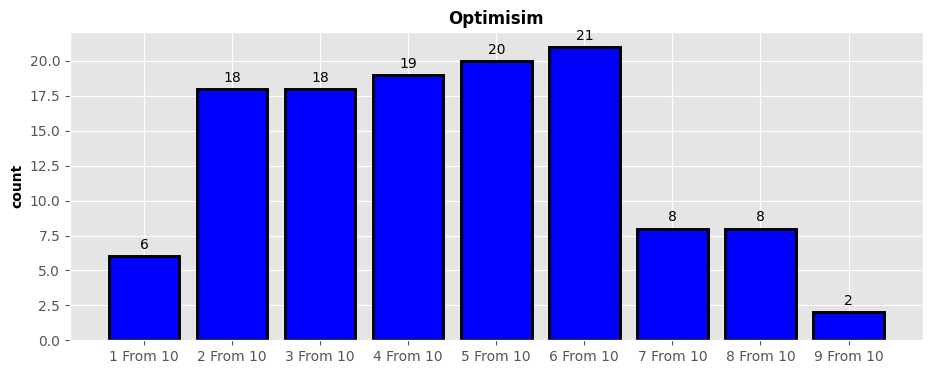

In [31]:
bar_plot('Optimisim')

In [32]:
expected, observed, stats = pg.chi2_independence(data,
                                                 x = 'Sadness',
                                                 y = 'Expert_Diagnose')
stats

,test,lambda,chi2,dof,pval,cramer,power
0,pearson,1.000000,59.633778,9.0,1.577132e-09,0.407000,0.900856
1,cressie-read,0.666667,60.821279,9.0,9.309690e-10,0.411033,0.907573
2,log-likelihood,0.000000,70.343625,9.0,1.303821e-11,0.442040,0.948623
3,freeman-tukey,-0.500000,NaN,9.0,NaN,NaN,NaN
4,mod-log-likelihood,-1.000000,inf,9.0,0.000000e+00,inf,NaN
5,neyman,-2.000000,NaN,9.0,NaN,NaN,NaN


There is a dependency between the x and y

In [33]:
expected, observed, stats = pg.chi2_independence(data,
                                                 x = 'Euphoric',
                                                 y = 'Expert_Diagnose')
stats

,test,lambda,chi2,dof,pval,cramer,power
0,pearson,1.000000,45.615154,9.0,7.098007e-07,0.355962,0.785845
1,cressie-read,0.666667,47.306781,9.0,3.440572e-07,0.362502,0.803667
2,log-likelihood,0.000000,57.603137,9.0,3.872909e-09,0.400011,0.888408
3,freeman-tukey,-0.500000,NaN,9.0,NaN,NaN,NaN
4,mod-log-likelihood,-1.000000,inf,9.0,0.000000e+00,inf,NaN
5,neyman,-2.000000,NaN,9.0,NaN,NaN,NaN


There is a dependency between the x and y

In [34]:
expected, observed, stats = pg.chi2_independence(data,
                                                 x = 'Sleep_dissorder',
                                                 y = 'Expert_Diagnose')
stats

,test,lambda,chi2,dof,pval,cramer,power
0,pearson,1.000000,22.604199,9.0,0.007149,0.250578,0.427840
1,cressie-read,0.666667,21.971610,9.0,0.008969,0.247047,0.415672
2,log-likelihood,0.000000,21.774904,9.0,0.009620,0.245939,0.411879
3,freeman-tukey,-0.500000,22.653115,9.0,0.007024,0.250849,0.428779
4,mod-log-likelihood,-1.000000,24.662682,9.0,0.003368,0.261739,0.467021
5,neyman,-2.000000,34.419337,9.0,0.000075,0.309207,0.637038


There is no dependency between the x and y

In [35]:
expected, observed, stats = pg.chi2_independence(data,
                                                 x = 'Suicidal_thoughts',
                                                 y = 'Expert_Diagnose')
stats

,test,lambda,chi2,dof,pval,cramer,power
0,pearson,1.000000,34.767256,3.0,1.364281e-07,0.538263,0.999588
1,cressie-read,0.666667,35.699503,3.0,8.667894e-08,0.545432,0.999688
2,log-likelihood,0.000000,39.449923,3.0,1.393603e-08,0.573367,0.999901
3,freeman-tukey,-0.500000,44.815919,3.0,1.012484e-09,0.611119,0.999981
4,mod-log-likelihood,-1.000000,53.998430,3.0,1.122925e-11,0.670811,0.999999
5,neyman,-2.000000,98.531957,3.0,3.214611e-21,0.906145,1.000000


There is a dependency

In [36]:
expected, observed, stats = pg.chi2_independence(data,
                                                 x = 'Anorxia',
                                                 y = 'Expert_Diagnose')
stats

,test,lambda,chi2,dof,pval,cramer,power
0,pearson,1.000000,6.701251,3.0,0.082055,0.236313,0.568931
1,cressie-read,0.666667,6.727406,3.0,0.081113,0.236774,0.570764
2,log-likelihood,0.000000,6.821836,3.0,0.077799,0.238430,0.577345
3,freeman-tukey,-0.500000,6.931826,3.0,0.074103,0.240344,0.584933
4,mod-log-likelihood,-1.000000,7.078252,3.0,0.069445,0.242869,0.594902
5,neyman,-2.000000,7.494426,3.0,0.057702,0.249907,0.622402


There is no dependency

In [37]:
expected, observed, stats = pg.chi2_independence(data,
                                                 x = 'Authority_Respect',
                                                 y = 'Expert_Diagnose')
stats

,test,lambda,chi2,dof,pval,cramer,power
0,pearson,1.000000,19.432526,3.0,0.000222,0.402415,0.971253
1,cressie-read,0.666667,19.516791,3.0,0.000214,0.403286,0.971852
2,log-likelihood,0.000000,19.984581,3.0,0.000171,0.408091,0.974973
3,freeman-tukey,-0.500000,20.617032,3.0,0.000126,0.414498,0.978682
4,mod-log-likelihood,-1.000000,21.519359,3.0,0.000082,0.423471,0.983091
5,neyman,-2.000000,24.292716,3.0,0.000022,0.449933,0.991866


There is a dependency

In [38]:
expected, observed, stats = pg.chi2_independence(data,
                                                 x = 'Try-Explanation',
                                                 y = 'Expert_Diagnose')
stats

,test,lambda,chi2,dof,pval,cramer,power
0,pearson,1.000000,0.816943,3.0,0.845410,0.082510,0.102663
1,cressie-read,0.666667,0.817268,3.0,0.845332,0.082526,0.102686
2,log-likelihood,0.000000,0.818535,3.0,0.845029,0.082590,0.102775
3,freeman-tukey,-0.500000,0.820026,3.0,0.844671,0.082665,0.102879
4,mod-log-likelihood,-1.000000,0.821985,3.0,0.844202,0.082764,0.103016
5,neyman,-2.000000,0.827320,3.0,0.842922,0.083032,0.103390


There is no dependency

In [40]:
expected, observed, stats = pg.chi2_independence(data,
                                                 x = 'Aggressive_Response',
                                                 y = 'Expert_Diagnose')
stats

,test,lambda,chi2,dof,pval,cramer,power
0,pearson,1.000000,22.052152,3.0,6.362136e-05,0.428682,0.985275
1,cressie-read,0.666667,22.380220,3.0,5.436445e-05,0.431859,0.986485
2,log-likelihood,0.000000,23.790342,3.0,2.762841e-05,0.445256,0.990694
3,freeman-tukey,-0.500000,25.697477,3.0,1.103463e-05,0.462759,0.994444
4,mod-log-likelihood,-1.000000,28.620823,3.0,2.690276e-06,0.488372,0.997537
5,neyman,-2.000000,39.441821,3.0,1.399123e-08,0.573308,0.999900


There is a dependency

In [41]:
expected, observed, stats = pg.chi2_independence(data,
                                                 x = 'Ignore_&_Move-On',
                                                 y = 'Expert_Diagnose')
stats

,test,lambda,chi2,dof,pval,cramer,power
0,pearson,1.000000,8.942409,3.0,0.030066,0.272984,0.708164
1,cressie-read,0.666667,9.125413,3.0,0.027669,0.275763,0.717898
2,log-likelihood,0.000000,9.647436,3.0,0.021814,0.283541,0.744323
3,freeman-tukey,-0.500000,10.205583,3.0,0.016897,0.291627,0.770421
4,mod-log-likelihood,-1.000000,10.945119,3.0,0.012026,0.302009,0.801701
5,neyman,-2.000000,13.175366,3.0,0.004272,0.331353,0.875549


There is a dependency

In [42]:
expected, observed, stats = pg.chi2_independence(data,
                                                 x = 'Nervous_Break-down',
                                                 y = 'Expert_Diagnose')
stats

,test,lambda,chi2,dof,pval,cramer,power
0,pearson,1.000000,17.515622,3.0,0.000554,0.382052,0.953982
1,cressie-read,0.666667,17.694754,3.0,0.000508,0.384000,0.955929
2,log-likelihood,0.000000,18.438530,3.0,0.000357,0.391988,0.963231
3,freeman-tukey,-0.500000,19.393055,3.0,0.000227,0.402006,0.970968
4,mod-log-likelihood,-1.000000,20.770151,3.0,0.000118,0.416034,0.979499
5,neyman,-2.000000,25.271167,3.0,0.000014,0.458904,0.993758


There is a dependency

In [43]:
expected, observed, stats = pg.chi2_independence(data,
                                                 x = 'Admit_Mistakes',
                                                 y = 'Expert_Diagnose')
stats

,test,lambda,chi2,dof,pval,cramer,power
0,pearson,1.000000,5.737538,3.0,0.125102,0.218661,0.498252
1,cressie-read,0.666667,5.760919,3.0,0.123839,0.219107,0.500035
2,log-likelihood,0.000000,5.842071,3.0,0.119552,0.220644,0.506197
3,freeman-tukey,-0.500000,5.934575,3.0,0.114837,0.222384,0.513175
4,mod-log-likelihood,-1.000000,6.056072,3.0,0.108914,0.224649,0.522260
5,neyman,-2.000000,6.394943,3.0,0.093899,0.230849,0.547113


There is no dependency

In [44]:
expected, observed, stats = pg.chi2_independence(data,
                                                 x = 'Overthinking',
                                                 y = 'Expert_Diagnose')
stats

,test,lambda,chi2,dof,pval,cramer,power
0,pearson,1.000000,10.262512,3.0,0.016462,0.292440,0.772961
1,cressie-read,0.666667,10.327771,3.0,0.015976,0.293368,0.775844
2,log-likelihood,0.000000,10.569154,3.0,0.014299,0.296776,0.786258
3,freeman-tukey,-0.500000,10.855129,3.0,0.012536,0.300765,0.798090
4,mod-log-likelihood,-1.000000,11.241038,3.0,0.010491,0.306064,0.813208
5,neyman,-2.000000,12.362742,3.0,0.006238,0.320972,0.851936


There is a dependency

In [45]:
expected, observed, stats = pg.chi2_independence(data,
                                                 x = 'Sexual_Activity',
                                                 y = 'Expert_Diagnose')
stats

,test,lambda,chi2,dof,pval,cramer,power
0,pearson,1.000000,76.483768,24.0,2.187797e-07,0.460928,0.861827
1,cressie-read,0.666667,76.805617,24.0,1.947643e-07,0.461897,0.863717
2,log-likelihood,0.000000,87.318040,24.0,3.987686e-09,0.492494,0.914881
3,freeman-tukey,-0.500000,NaN,24.0,NaN,NaN,NaN
4,mod-log-likelihood,-1.000000,inf,24.0,0.000000e+00,inf,NaN
5,neyman,-2.000000,NaN,24.0,NaN,NaN,NaN


There is a dependency

In [46]:
expected, observed, stats = pg.chi2_independence(data,
                                                 x = 'Concentration',
                                                 y = 'Expert_Diagnose')
stats

,test,lambda,chi2,dof,pval,cramer,power
0,pearson,1.000000,30.157765,21.0,0.088863,0.289433,0.394814
1,cressie-read,0.666667,31.248239,21.0,0.069625,0.294620,0.410467
2,log-likelihood,0.000000,37.017049,21.0,0.016758,0.320664,0.492449
3,freeman-tukey,-0.500000,NaN,21.0,NaN,NaN,NaN
4,mod-log-likelihood,-1.000000,inf,21.0,0.000000,inf,NaN
5,neyman,-2.000000,NaN,21.0,NaN,NaN,NaN


There is no dependency

In [47]:
expected, observed, stats = pg.chi2_independence(data,
                                                 x = 'Optimisim',
                                                 y = 'Expert_Diagnose')
stats

,test,lambda,chi2,dof,pval,cramer,power
0,pearson,1.000000,88.959020,24.0,2.142072e-09,0.497100,0.921189
1,cressie-read,0.666667,87.801863,24.0,3.321314e-09,0.493856,0.916783
2,log-likelihood,0.000000,95.356628,24.0,1.838840e-10,0.514664,0.942133
3,freeman-tukey,-0.500000,NaN,24.0,NaN,NaN,NaN
4,mod-log-likelihood,-1.000000,inf,24.0,0.000000e+00,inf,NaN
5,neyman,-2.000000,NaN,24.0,NaN,NaN,NaN


There is a dependency

## Preprocessing

In [49]:
#Searching for numeric values not parts of words and returns integer
def preprocess_cols(txt:str):
    match = re.search(r'\b\d+\b', txt)
    if match:
        num = int(match.group())

    return num

In [50]:
data['Sexual_Activity'] = data['Sexual_Activity'].apply(preprocess_cols)
data['Concentration'] = data['Concentration'].apply(preprocess_cols)
data['Optimisim'] = data['Optimisim'].apply(preprocess_cols)

data.head()

,Sadness,Euphoric,Exhausted,Sleep_dissorder,Mood_Swing,Suicidal_thoughts,Anorxia,Authority_Respect,Try-Explanation,Aggressive_Response,Ignore_&_Move-On,Nervous_Break-down,Admit_Mistakes,Overthinking,Sexual_Activity,Concentration,Optimisim,Expert_Diagnose
0,Usually,Seldom,Sometimes,Sometimes,YES,YES,NO,NO,YES,NO,NO,YES,YES,YES,3,3,4,Bipolar Type-2
1,Usually,Seldom,Usually,Sometimes,NO,YES,NO,NO,NO,NO,NO,NO,NO,NO,4,2,5,Depression
2,Sometimes,Most-Often,Sometimes,Sometimes,YES,NO,NO,NO,YES,YES,NO,YES,YES,NO,6,5,7,Bipolar Type-1
3,Usually,Seldom,Usually,Most-Often,YES,YES,YES,NO,YES,NO,NO,NO,NO,NO,3,2,2,Bipolar Type-2
4,Usually,Usually,Sometimes,Sometimes,NO,NO,NO,NO,NO,NO,NO,YES,YES,YES,5,5,6,Normal


In [51]:
data.dtypes

Sadness                object
Euphoric               object
Exhausted              object
Sleep_dissorder        object
Mood_Swing             object
Suicidal_thoughts      object
Anorxia                object
Authority_Respect      object
Try-Explanation        object
Aggressive_Response    object
Ignore_&_Move-On       object
Nervous_Break-down     object
Admit_Mistakes         object
Overthinking           object
Sexual_Activity         int64
Concentration           int64
Optimisim               int64
Expert_Diagnose        object
dtype: object

In [52]:
#Labels to numbers for easier manipulation
LABELS = ['Depression', 'Normal', 'Bipolar Type-1', 'Bipolar Type-2']

label2id = dict(zip(LABELS, range(len(LABELS))))
label2id

{'Depression': 0, 'Normal': 1, 'Bipolar Type-1': 2, 'Bipolar Type-2': 3}

In [53]:
data['Expert_Diagnose'] = data['Expert_Diagnose'].map(label2id)

In [54]:
X = data.drop("Expert_Diagnose", axis = 1)
y = data['Expert_Diagnose']

SEED = 1234

X_train, X_test, y_train, y_test = tts(X,
                                       y,
                                       test_size = 0.3,
                                       random_state = SEED)

In [59]:
y_train.value_counts()

3    24
2    20
1    20
0    20
Name: Expert_Diagnose, dtype: int64

In [56]:
y_test.value_counts()

0    11
1    10
2     8
3     7
Name: Expert_Diagnose, dtype: int64

In [60]:
categorical_variables = X_train.select_dtypes(include = ['object','category']).columns.to_list()
categorical_variables

['Sadness',
 'Euphoric',
 'Exhausted',
 'Sleep_dissorder',
 'Mood_Swing',
 'Suicidal_thoughts',
 'Anorxia',
 'Authority_Respect',
 'Try-Explanation',
 'Aggressive_Response',
 'Ignore_&_Move-On',
 'Nervous_Break-down',
 'Admit_Mistakes',
 'Overthinking']

In [58]:
preprocessor = ColumnTransformer([('ohe', OneHotEncoder(drop = 'first',
                                                        sparse_output = False,
                                                        handle_unknown = "ignore"),
                                   categorical_variables)],
                                 remainder = 'passthrough',
                                 verbose_feature_names_out = False).set_output(transform = 'pandas')

X_train_prep = preprocessor.fit_transform(X_train)
X_test_prep = preprocessor.transform(X_test)

## Models


In [61]:
lr = LogisticRegression(random_state = SEED, multi_class = 'multinomial')
lr.fit(X_train_prep, y_train)

y_pred_train = lr.predict(X_train_prep)
y_pred_test = lr.predict(X_test_prep)

print(f"Accuracy Train: {accuracy_score(y_train, y_pred_train):.4f}")
print(f"Accuracy Test: {accuracy_score(y_test, y_pred_test):.4f}")

Accuracy Train: 1.0000
Accuracy Test: 0.8333


In [62]:
# We define the candidate models, we choose the model that best generalizes.
clf1 = RandomForestClassifier(random_state = SEED, n_jobs = -1)
clf2 = ExtraTreesClassifier(bootstrap = True, n_jobs = -1, random_state = SEED)
clf3 = XGBClassifier(random_state = SEED)
clf4 = LGBMClassifier(random_state = SEED, n_jobs = -1)
clf5 = CatBoostClassifier(random_state = SEED, verbose = 0)

MODELS = [clf1, clf2, clf3, clf4, clf5]

In [63]:
# Training!!!
#=====================================================================
accuracy_train = {}
accuracy_test = {}

for model in tqdm(MODELS):
    name = type(model).__name__
    model.fit(X_train_prep, y_train)
    y_pred_train = model.predict(X_train_prep)
    y_pred_test = model.predict(X_test_prep)
    accuracy_train[name] = accuracy_score(y_train, y_pred_train)
    accuracy_test[name] = accuracy_score(y_test, y_pred_test)
    print(f'* {name} finished.')

  0%|          | 0/5 [00:00<?, ?it/s]

* RandomForestClassifier finished.
* ExtraTreesClassifier finished.
* XGBClassifier finished.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010138 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 65
[LightGBM] [Info] Number of data points in the train set: 84, number of used features: 21
[LightGBM] [Info] Start training from score -1.435085
[LightGBM] [Info] Start training from score -1.435085
[LightGBM] [Info] Start training from score -1.435085
[LightGBM] [Info] Start training from score -1.252763
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits wit

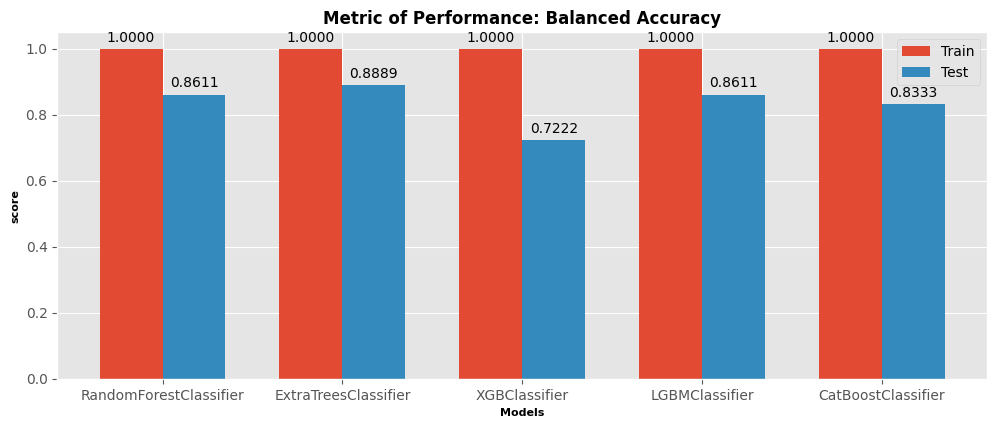

In [64]:
metric_train = pd.DataFrame.from_dict(accuracy_train, orient = 'index')
metric_train = metric_train.rename(columns = {0:'Train'})

metric_test = pd.DataFrame.from_dict(accuracy_test, orient = 'index')
metric_test = metric_test.rename(columns = {0:'Test'})

fig,ax = plt.subplots(figsize = (12,4.5))

labels = metric_train.index.to_list()
values_train = metric_train.iloc[:,0].to_list()
values_test = metric_test.iloc[:,0].to_list()
x = np.arange(len(labels))
width = 0.35

rects1 = ax.bar(x = x - width/2, height = values_train, width = width, label = 'Train')
rects2 = ax.bar(x = x + width/2, height = values_test, width = width, label = 'Test')


def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(text = f'{height:.4f}',
                    xy = (rect.get_x() + rect.get_width()/2, height),
                    xytext = (0,3),
                    textcoords = "offset points",
                    ha = "center",
                    va = "bottom")

autolabel(rects1)
autolabel(rects2)
ax.legend()
ax.set_title("Metric of Performance: Balanced Accuracy", fontsize = 12, fontweight = "bold", color = "black")
ax.set_ylabel("score", fontsize = 8, fontweight = "bold", color = "black")
ax.set_xlabel("Models", fontsize = 8, fontweight = "bold", color = "black")
ax.set_xticks(x)
ax.set_xticklabels(labels)
fig.show()

## Metrics

In [65]:
# Predictions !!!
y_pred_train_final = clf2.predict(X_train_prep)
y_pred_test_final = clf2.predict(X_test_prep)

Classification Report

In [66]:
print("##" * 30)
print(" " * 12, "Classification Report Train")
print("##" * 30)
print(classification_report(y_train, y_pred_train_final))
print("")

print("##" * 30)
print(" " * 12, "Classification Report Test")
print("##" * 30)
print(classification_report(y_test, y_pred_test_final))

############################################################
             Classification Report Train
############################################################
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        20
           2       1.00      1.00      1.00        20
           3       1.00      1.00      1.00        24

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84


############################################################
             Classification Report Test
############################################################
              precision    recall  f1-score   support

           0       0.91      0.91      0.91        11
           1       0.89      0.80      0.84        10
           2       0.88      0.88      0.88         8
           3       0.8

Confusion Matrix

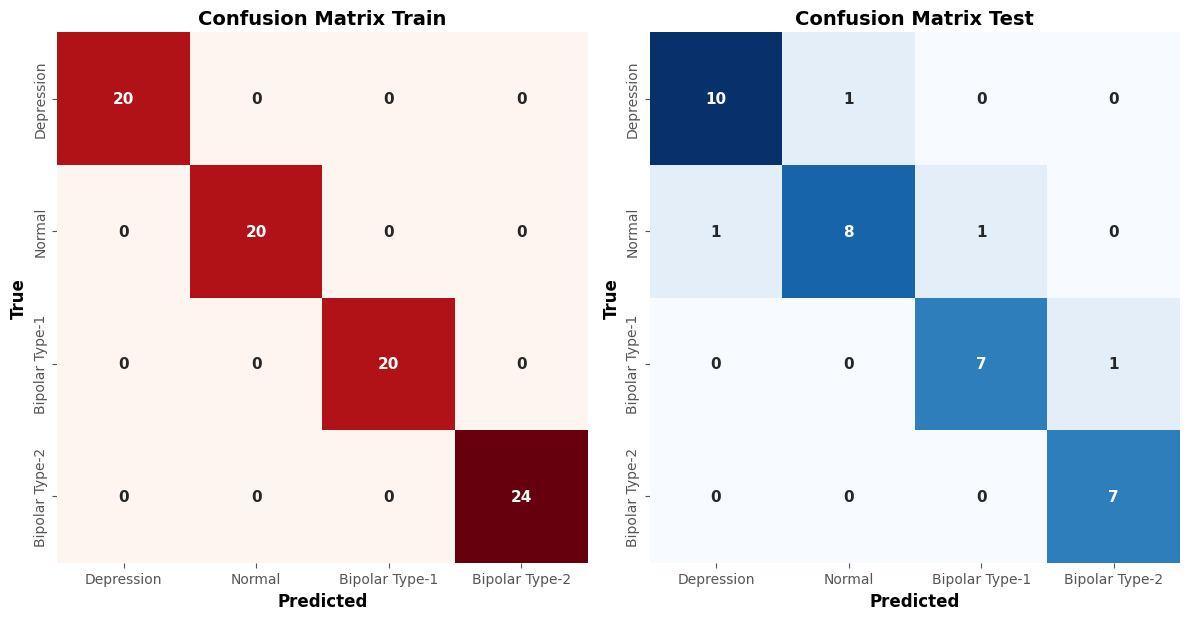

In [67]:
cf_mx_train = confusion_matrix(y_train, y_pred_train_final)
cf_mx_test = confusion_matrix(y_test, y_pred_test_final)

fig,axs = plt.subplots(nrows = 1, ncols = 2, figsize = (12,8))
axs = axs.flat

sns.heatmap(cf_mx_train, cmap = 'Reds', annot = True, annot_kws = {'fontsize':11, 'fontweight':'bold'}, fmt = '', xticklabels = LABELS, yticklabels = LABELS, cbar = False, square = True, ax = axs[0])
sns.heatmap(cf_mx_test, cmap = 'Blues', annot = True, annot_kws = {'fontsize':11, 'fontweight':'bold'}, fmt = '', xticklabels = LABELS, yticklabels = LABELS, cbar = False, square = True, ax = axs[1])
axs[0].set_xlabel('Predicted', fontsize = 12, fontweight = "bold", color = "black")
axs[1].set_xlabel('Predicted', fontsize = 12, fontweight = "bold", color = "black")
axs[0].set_ylabel('True', fontsize = 12, fontweight = "bold", color = "black")
axs[1].set_ylabel('True', fontsize = 12, fontweight = "bold", color = "black")
axs[0].set_title('Confusion Matrix Train', fontsize = 14, fontweight = "bold", color = "black")
axs[1].set_title('Confusion Matrix Test', fontsize = 14, fontweight = "bold", color = "black")

fig.tight_layout()
fig.show()

## Feature importance

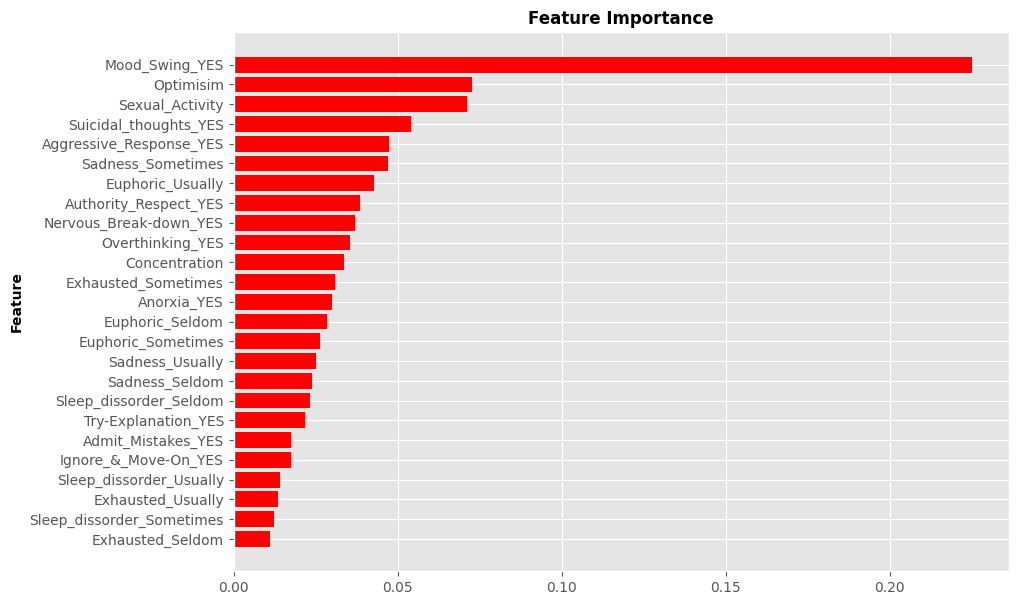

In [68]:
feature_importance = clf2.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(10, 7))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center', color = 'red')
plt.yticks(range(len(sorted_idx)), np.array(X_test_prep.columns)[sorted_idx])
plt.ylabel("Feature", fontsize = 10, fontweight = 'bold', color = 'black')
plt.title('Feature Importance', fontsize = 12, fontweight = 'bold', color = 'black')
plt.show()